# Visualizations

In this notebook, we'll create visualizations that will be used to best communicate the model process in the presentation

In [1]:
## Import models relevant visualization models
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas as gpd

In [20]:
## Read in raw data
zillow_data = pd.read_csv('../data/raw/zillow_data.csv')
zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [66]:
## Eliminate extraneous columns (RegionID (zillow's index), Size rank)
new_zillow = zillow_data.drop(['RegionID', 'Metro', 'SizeRank'], axis=1)
new_zillow.head()

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [67]:
## Create pivot table in preparation for conversion to datetime objects
zillow_melted = pd.melt(new_zillow,
                        id_vars=['RegionName', 'City', 'State', 'CountyName'],
                        var_name='time')
zillow_melted.head()

,RegionName,City,State,CountyName,time,value
0,60657,Chicago,IL,Cook,1996-04,334200.0
1,75070,McKinney,TX,Collin,1996-04,235700.0
2,77494,Katy,TX,Harris,1996-04,210400.0
3,60614,Chicago,IL,Cook,1996-04,498100.0
4,79936,El Paso,TX,El Paso,1996-04,77300.0


In [68]:
## Convert time information to datetime objects
## Set time as index for time-series analysis
zillow_melted['time'] = pd.to_datetime(zillow_melted['time'], infer_datetime_format=True)
zillow_melted.head()

,RegionName,City,State,CountyName,time,value
0,60657,Chicago,IL,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,1996-04-01,77300.0


In [69]:
type(zillow_melted['time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [70]:
zillow_melted.set_index('time', inplace=True)

In [71]:
zillow_tableau = zillow_melted.drop(['RegionName', 'City'], axis=1)

In [77]:
zillow_tableau.head()

,State,CountyName,value,price
time,,,,
1996-04-01,IL,Cook,334200.0,334200.0
1996-04-01,TX,Collin,235700.0,235700.0
1996-04-01,TX,Harris,210400.0,210400.0
1996-04-01,IL,Cook,498100.0,498100.0
1996-04-01,TX,El Paso,77300.0,77300.0


In [78]:
zillow_tableau['price'] = zillow_tableau['value']

In [79]:
zillow_tableau.drop('value', axis=1, inplace=True)

In [84]:
mean_zillow = zillow_tableau.resample('M').mean()

In [86]:
max_zillow = zillow_tableau.resample('M').max()
min_zillow = zillow_tableau.resample('M').min()

In [88]:
mean_zillow.head()

,price
time,
1996-04-30,118299.123063
1996-05-31,118419.044139
1996-06-30,118537.423268
1996-07-31,118653.069278
1996-08-31,118780.254312


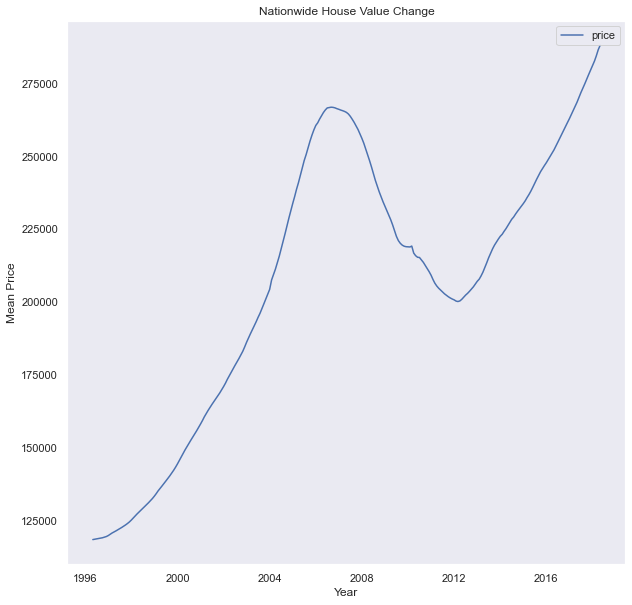

In [107]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(10,10))

sns.lineplot(data=mean_zillow, ax=ax
            )
ax.set_xlabel('Year')
ax.set_ylabel('Mean Price')
ax.set_title('Nationwide House Value Change');

In [89]:
max_zillow.head()

,State,CountyName,price
time,,,
1996-04-30,WY,Yuma,3676700.0
1996-05-31,WY,Yuma,3704200.0
1996-06-30,WY,Yuma,3729600.0
1996-07-31,WY,Yuma,3754600.0
1996-08-31,WY,Yuma,3781800.0


In [90]:
min_zillow.head()

,State,CountyName,price
time,,,
1996-04-30,AK,Acadia,11300.0
1996-05-31,AK,Acadia,11500.0
1996-06-30,AK,Acadia,11600.0
1996-07-31,AK,Acadia,11800.0
1996-08-31,AK,Acadia,11800.0
